In [1]:
import pandas
from pandas import Series, DataFrame

In [2]:
data00 = pandas.read_excel('Teens_Gaming_2008.xlsx', 'Teens_Gaming_2008',)
data00.head()
    

,psraid,weight,int_date,tz,cregion,fips,state,msa,usr,usr1,cstatus,p1,p2,kidage,kidgen,...,k4cnt,k6cnt,k7cnt,k8cnt,k9cnt,k14cnt,k26cnt,k29cnt,raceos,modemos,k3dos,k12os,k13os,k17game,k28game
0,634,4.000000,110707,E,1,34017,34,35620,S,2,2,2,1,16,1,...,3.0,3,5,2,3,5.0,4.0,0.0,NaN,NaN,WORK,NaN,NaN,"MADDEN, NBA LIVE, NASCAR",NaN
1,16854,1.333333,12408,E,1,34003,34,35620,S,2,1,1,1,13,2,...,3.0,5,5,3,3,5.0,3.0,1.0,NaN,NaN,A CELL PHONE,NaN,NaN,"THE SIMS 2, CRAZY TAXI 4, SIM PETS","WORD SEARCH, BRAIN TEASERS, POLITICAL GAMES"
2,14856,1.937500,11808,E,1,34003,34,35620,S,2,0,2,2,14,1,...,3.0,5,4,5,3,5.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,"CALL OF DUTY 4, GUITAR HERO 3, ORANGE BOX",NaN
3,14752,1.791667,12108,E,1,34003,34,35620,S,2,2,2,1,12,1,...,2.0,5,5,5,4,10.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,"HALO 3, GUITAR HERO, MARIO GALAXY",NaN
4,115,1.000000,110107,E,1,34003,34,35620,S,2,2,3,1,14,1,...,3.0,5,6,3,4,8.0,1.0,1.0,NaN,NaN,YUOR FRIENDS HOUSE,NaN,NaN,"HALO 3, GUITER HERO, BLOON'S POWER DEFENSE 2",NaN


In [3]:
dataA = data00[['psraid','educ','income','p2']]
dataA

,psraid,educ,income,p2
0,634,3,4,1
1,16854,5,5,1
2,14856,7,8,2
3,14752,6,8,1
4,115,7,6,1
5,1404,5,6,1
6,14866,7,8,1
7,4152,3,8,1
8,14797,3,7,1
9,14771,6,7,2


Every record has a unique id

In [4]:
dataApsa = dataA['psraid'].groupby([dataA['psraid']]).count().reset_index(name="count")
dataApsa = dataApsa['count'].groupby(dataApsa['count']).count().reset_index(name="countCounts")
dataApsa



,count,countCounts
0,1,1102


In [5]:
dataApsa['countCounts'].min()

1102

In [6]:
dataAeduc = dataA['educ'].groupby([dataA['educ']]).count().reset_index(name="count")
dataAeduc['total']=dataApsa['countCounts'].min()
dataAeduc['percent'] = round(dataAeduc['count']/dataAeduc['total'],2)
dataAeduc['vizpre'] = round((dataAeduc['count']/dataAeduc['total']*100),0)
dataAeduc

,educ,count,total,percent,vizpre
0,1,23,1102,0.02,2.0
1,2,50,1102,0.05,5.0
2,3,253,1102,0.23,23.0
3,4,54,1102,0.05,5.0
4,5,290,1102,0.26,26.0
5,6,279,1102,0.25,25.0
6,7,149,1102,0.14,14.0
7,9,4,1102,0.00,0.0


In [7]:
dataAincome = dataA['income'].groupby([dataA['income']]).count().reset_index(name="count")
dataAincome['total']=dataApsa['countCounts'].min()
dataAincome['percent'] = round(dataAincome['count']/dataAincome['total'],2)
dataAincome['vizpre'] = round((dataAincome['count']/dataAincome['total']*100),0)
dataAincome

,income,count,total,percent,vizpre
0,1,37,1102,0.03,3.0
1,2,56,1102,0.05,5.0
2,3,84,1102,0.08,8.0
3,4,98,1102,0.09,9.0
4,5,95,1102,0.09,9.0
5,6,207,1102,0.19,19.0
6,7,178,1102,0.16,16.0
7,8,231,1102,0.21,21.0
8,9,116,1102,0.11,11.0


In [8]:
dataAp2 = dataA['p2'].groupby([dataA['p2']]).count().reset_index(name="count")
dataAp2['total']=dataApsa['countCounts'].min()
dataAp2['percent'] = round(dataAeduc['count']/dataAeduc['total'],2)
dataAp2['vizpre'] = round((dataAeduc['count']/dataAeduc['total']*100),0)
dataAp2

,p2,count,total,percent,vizpre
0,1,734,1102,0.02,2.0
1,2,297,1102,0.05,5.0
2,3,47,1102,0.23,23.0
3,4,24,1102,0.05,5.0


In [9]:
pd.set_option('display.max_rows', 1000)

In [10]:
dataB = data00[['psraid','k17game']]
new = dataB['k17game'].str.split(",", n = -1, expand = True)
new = pandas.melt(new, [0])
new = new.dropna()
new = new[['variable','value']]
new = new['value'].groupby([new['value']]).count().reset_index(name="count")
new.head(50)

,value,count
0,,6
1,ALL NEW GAMES THAT JUST CAME OUT,1
2,CALL OF DUTY 4,1
3,DANCE DANCE REVOLUTION,1
4,DUNGEONS AND DRAGONS,1
5,GATE HILLCON,1
6,GUITAR HERO,2
7,I THINK IT'S CALLED THEATER TYCOON,1
8,KARAOKE,1
9,MADDEN,1


In [11]:
new.sort_values(by=['count'], ascending=False).head(10)


,value,count
273,GUITAR HERO,63
290,HALO 3,50
261,GRAND THEFT AUTO,36
162,DANCE DANCE REVOLUTION,32
715,TETRIS,31
367,MADDEN,30
285,HALO,29
638,SOLITAIRE,23
369,MADDEN 08,23
289,HALO 2,22


In [12]:
dataC = data00[['psraid','k14a','k14b','k14c','k14d','k14e','k14f','k14g','k14h','k14i','k14j','k14k','k14l']]
dataC.head(10)

,psraid,k14a,k14b,k14c,k14d,k14e,k14f,k14g,k14h,k14i,k14j,k14k,k14l
0,634,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0
1,16854,8.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0
2,14856,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
3,14752,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
4,115,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
5,1404,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0
6,14866,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
7,4152,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
8,14797,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0
9,14771,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0


In [13]:
dataC = pandas.melt(dataC, ['psraid'])
dataC.head(10)

,psraid,variable,value
0,634,k14a,1.0
1,16854,k14a,8.0
2,14856,k14a,2.0
3,14752,k14a,1.0
4,115,k14a,1.0
5,1404,k14a,2.0
6,14866,k14a,1.0
7,4152,k14a,2.0
8,14797,k14a,2.0
9,14771,k14a,1.0


In [14]:
dataC['value'].dtype

dtype('float64')

In [15]:
dataC.loc[dataC.value == 1, 'newValue'] = 1
dataC.loc[dataC.value != 1, 'newValue'] = 0
dataC.head(10)


,psraid,variable,value,newValue
0,634,k14a,1.0,1.0
1,16854,k14a,8.0,0.0
2,14856,k14a,2.0,0.0
3,14752,k14a,1.0,1.0
4,115,k14a,1.0,1.0
5,1404,k14a,2.0,0.0
6,14866,k14a,1.0,1.0
7,4152,k14a,2.0,0.0
8,14797,k14a,2.0,0.0
9,14771,k14a,1.0,1.0


In [16]:
dataC = dataC[['psraid','variable','newValue']].dropna()
dataC.head(10)

,psraid,variable,newValue
0,634,k14a,1.0
1,16854,k14a,0.0
2,14856,k14a,0.0
3,14752,k14a,1.0
4,115,k14a,1.0
5,1404,k14a,0.0
6,14866,k14a,1.0
7,4152,k14a,0.0
8,14797,k14a,0.0
9,14771,k14a,1.0


In [17]:
dataC2 = pandas.crosstab(dataC.newValue, dataC.variable)
dataC2.head(10)

variable,k14a,k14b,k14c,k14d,k14e,k14f,k14g,k14h,k14i,k14j,k14k,k14l
newValue,,,,,,,,,,,,
0.0,601,332,401,614,470,581,402,717,412,334,439,784
1.0,501,770,701,488,632,521,700,385,690,768,663,318


In [18]:
dataC3 = dataC.pivot_table(['newValue'],index=['psraid'], columns=['variable'])
dataC3.head(10)
list(dataC3.columns)

newValue                                                       
variable     k14a k14b k14c k14d k14e k14f k14g k14h k14i k14j k14k k14l
psraid                                                                  
11            1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0
51            0.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0
53            0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0
56            0.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0
69            0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0
103           0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0
115           1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0
322           0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
330           0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
362           1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0

[('newValue', 'k14a'),
 ('newValue', 'k14b'),
 ('newValue', 'k14c'),
 ('newValue', 'k14d'),
 ('newValue', 'k14e'),
 ('newValue', 'k14f'),
 ('newValue', 'k14g'),
 ('newValue', 'k14h'),
 ('newValue', 'k14i'),
 ('newValue', 'k14j'),
 ('newValue', 'k14k'),
 ('newValue', 'k14l')]

In [19]:
dataC3.columns =[s1+str(s2) for (s1,s2) in dataC3.columns.tolist()]
dataC3.head(5)


,newValuek14a,newValuek14b,newValuek14c,newValuek14d,newValuek14e,newValuek14f,newValuek14g,newValuek14h,newValuek14i,newValuek14j,newValuek14k,newValuek14l
psraid,,,,,,,,,,,,
11,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
51,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
53,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
56,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
69,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [20]:
dataC3.reset_index(inplace=True)
dataC3.head(5)

,psraid,newValuek14a,newValuek14b,newValuek14c,newValuek14d,newValuek14e,newValuek14f,newValuek14g,newValuek14h,newValuek14i,newValuek14j,newValuek14k,newValuek14l
0,11,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,51,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,53,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,56,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,69,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [21]:
dataC3.columns = [x.strip().replace('newValuek14', '') for x in dataC3.columns]
dataC3.head()

,psraid,a,b,c,d,e,f,g,h,i,j,k,l
0,11,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,51,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,53,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,56,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,69,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [22]:
dataC3.reset_index(inplace=True)
dataC3.head(5)
list(dataC3.columns)

,index,psraid,a,b,c,d,e,f,g,h,i,j,k,l
0,0,11,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1,51,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,2,53,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,3,56,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,69,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


['index', 'psraid', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

In [64]:
# revenue00.drop(['Unnamed: 0'], axis=1)
dataC4 = dataC3.drop(['psraid','index'], axis=1)
dataC4.head(4)

,a,b,c,d,e,f,g,h,i,j,k,l
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [39]:
import random

In [40]:
def vector_add(v,w):
    """add corresponding elements"""
    return [v_i + w_i for v_i,w_i in zip(v,w) ]

In [41]:
def vector_sum(vectors):
    """sums all corresponding elements"""
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result,vector)
    return result

In [42]:
def scalar_multiply(c,v):
    """c is a number, v is a vector"""
    return [c*v_i for v_i in v]

In [43]:
def vector_mean(vectors):
    """compute the vector who ith element is the mean of the ith elements on the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sume(vectors))

In [101]:
class KMeans2:
    """performs k-means clustering"""
    
    def __init__(self, k):
        self.k = k #number of clusters
        self.means = None #means of clusters
    
    def classify(self,input):
        """return the index of the cluster closest to the input"""
        return min (range(self.k),
                    key = lambda i: squared_distance(input, self.means[i]))
    
    def train(self, inputs):
        # choose K random points as the initial means
        self.means = random.sample(list(inputs), self.k)
        assignments = None
        
        while True:
            #find new assignments
            new_assignments = map(self.classify, inputs)
            
            #if no assignments have changed, we're done.
            if assignments == new_assignments:
                return
            
            #otherwise keep the new assignments,
            assignments = new_assignments
            
            #And comput new means based on the new assignments
            for i in range(self.k):
                #find all the points assigned to cluster i
                i_points = [p for p, a in zip(inputs, assignments) if a==i]
                
                #make sure i_points is not zero so don't divide by 0
                if i_points:
                    self.means[i] = vector_mean(i_points)
                 
                    
    

In [102]:
def squared_clustering_errors(inputs, k):
    """find the total squared error from k-means clustering the inputs"""
    clusterer = KMeans2(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = map(clusterer.classify, inputs)

    return sum(squared_distance(input, means[cluster])
               for input, cluster in zip(inputs, assignments))

               
    

In [103]:
dataC4.head(3)

,a,b,c,d,e,f,g,h,i,j,k,l
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [104]:
dataset_array = dataC4.values
print(dataset_array.dtype)
print(dataset_array)

float64
[[1. 0. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]]


In [105]:
clusterer = KMeans2(5)

In [106]:
clusterer

In [107]:
clusterer.train(dataset_array)

NameError: name 'squared_distance' is not defined

In [57]:
# import statements
import sklearn
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

In [78]:
make_blobs.head(5)

AttributeError: 'function' object has no attribute 'head'

In [58]:
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)


In [59]:
# create np array for data points
points = data[0]


(-15, 15)

(-15, 15)

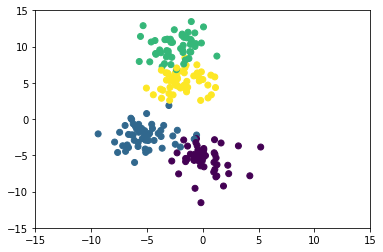

In [60]:
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [79]:
# import KMeans
from sklearn.cluster import KMeans


In [88]:
# create kmeans object
kmeans = KMeans(n_clusters=4)
# fit kmeans object to data
kmeans.fit(dataset_array)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(dataset_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[[0.13559322 0.8440678  0.58644068 0.04067797 0.66101695 0.54576271
  0.72542373 0.19322034 0.67457627 0.89830508 0.68135593 0.0440678 ]
 [0.72131148 0.55737705 0.85245902 0.89754098 0.3647541  0.36885246
  0.90163934 0.09836066 0.63114754 0.87704918 0.52459016 0.34836066]
 [0.85396825 0.72698413 0.92063492 0.75555556 0.86031746 0.62539683
  0.6952381  0.8984127  0.95238095 0.72380952 0.71111111 0.64761905]
 [0.06451613 0.62903226 0.12096774 0.0766129  0.31048387 0.29435484
  0.18951613 0.08467742 0.14919355 0.24596774 0.44354839 0.06451613]]


In [87]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 200 but corresponding boolean dimension is 1102

In [83]:
from sklearn import cluster

k_clusters = 2
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

In [85]:
algorithms['kmeans'].fit(dataset_array)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=200, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)